In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
# sns.set(style="ticks")

data =pd.read_csv("AB_NYC_2019.csv")
datadf = pd.DataFrame(data)
# read data
datadf.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
print(max(datadf['calculated_host_listings_count']))

327


In [4]:
# Check null value
datadf.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
# summary of dataset
datadf.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [21]:
# Cleaning up data.
datadf.drop(['latitude'],axis=1, inplace=True)
datadf.drop(['longitude'], axis=1, inplace=True)
datadf.drop(['last_review'],axis=1, inplace=True)
datadf.drop(['availability_365'],axis=1, inplace=True)
datadf

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,Mutiple Listing
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,under 10 unit
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,5 units
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,NaN,1,one unit
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,one unit
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,one unit
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,Entire home/apt,200,3,74,0.59,1,one unit
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,0.40,1,one unit
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,Private room,79,2,430,3.47,1,one unit
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,Private room,79,2,118,0.99,1,one unit
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,Entire home/apt,150,1,160,1.33,4,5 units


In [13]:
# Host summary

In [7]:
host_count = len(datadf['host_id'].unique())
id_count = len(datadf['id'].unique())
host=pd.DataFrame({"Host Count":[host_count],"List ID count":[id_count]})
host

,Host Count,List ID count
0,37457,48895


In [8]:
mutiple_list_count=datadf['host_id'].value_counts()
mutiple_list_count.describe()

count    37457.000000
mean         1.305363
std          2.760747
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        327.000000
Name: host_id, dtype: float64

In [39]:
list_bins = [0,1,5, 10, 20,30,50,100,200,max(datadf['calculated_host_listings_count'])]
list_group_names =['1_list','under 5_list','under 10_list','under 20_list','under 30_list','under 50_list','under 100_list','under 200_list','more than 201units']
datadf["Mutiple Listing"] = pd.cut(datadf["calculated_host_listings_count"], list_bins, labels=list_group_names)
list_Demographics = pd.DataFrame(datadf["Mutiple Listing"].value_counts())
total_list = len(datadf["id"]) 
list_Demographics["Percentage of listing"]= round(list_Demographics["Mutiple Listing"]/ total_list *100,2)
# list_Demographics["Percentage of listing"]= list_Demographics["Percentage of listing"].map("{:.2f}%".format)
list_Demographics


,Mutiple Listing,Percentage of listing
1_list,32303,66.07
under 5_list,11796,24.13
under 10_list,1829,3.74
under 20_list,762,1.56
under 50_list,575,1.18
more than 201units,559,1.14
under 100_list,539,1.10
under 30_list,308,0.63
under 200_list,224,0.46


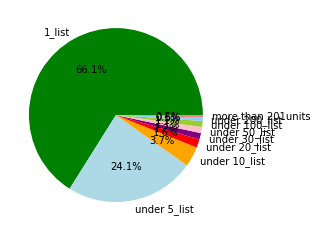

In [45]:
pies = ['1_list','under 5_list','under 10_list','under 20_list','under 30_list','under 50_list','under 100_list','under 200_list','more than 201units']
pie_votes = list_Demographics["Mutiple Listing"]
colors = ["green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral","yellow"]
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.pie(pie_votes, labels=pies,colors=colors,autopct="%1.1f%%")
plt.show()

<BarContainer object of 9 artists>

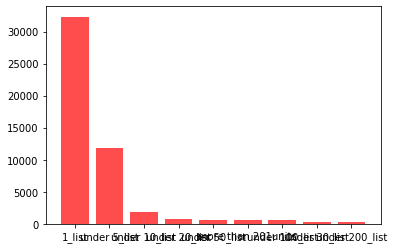

In [44]:
plt.bar( list_Demographics.index, list_Demographics["Mutiple Listing"],color='r',alpha=0.7,align ='center')

In [48]:
# price Demographics
min_p = min(datadf['price'])
max_p = max(datadf['price'])
mean_p = datadf['price'].mean()
print(f'min price:{min_p}, max price:{max_p},mean_p:{mean_p}')


min price:0, max price:10000,mean_p:152.7206871868289


In [54]:
price_bins = [0,50,100, 150, 200,250,300,1000, max(datadf['price'])]
price_group_names =['under 50','under 100','under 150','under 200','under 250','under 300','under 1000','over 1001']
datadf["price categories"] = pd.cut(datadf["price"], price_bins, labels=price_group_names)
datadf["list_price"] = pd.cut(datadf["price"], price_bins, labels=price_group_names)
price_Demographics = pd.DataFrame(datadf["list_price"].value_counts())
# price_Demographics["list_price"]= round(price_Demographics["list_price"]/ total_list *100,2)
# list_Demographics["Percentage of listing"]= list_Demographics["Percentage of listing"].map("{:.2f}%".format)
price_Demographics

,list_price
under 100,17367
under 150,10029
under 200,6554
under 50,6550
under 250,3176
under 1000,3118
under 300,1851
over 1001,239


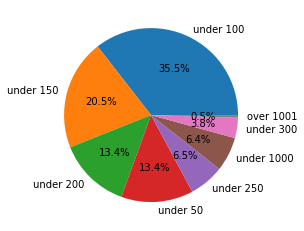

In [55]:
plt.pie(price_Demographics['list_price'],labels=price_Demographics.index,autopct="%1.1f%%")
plt.show()




In [22]:
area_mean=datadf.groupby('neighbourhood_group').count()
area_mean



,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,,,,,,
Bronx,1091,1090,1091,1090,1091,1091,1091,1091,1091,1091,1091,876,876,1091,1091
Brooklyn,20104,20098,20104,20095,20104,20104,20104,20104,20104,20104,20104,16447,16447,20104,20104
Manhattan,21661,21652,21661,21652,21661,21661,21661,21661,21661,21661,21661,16632,16632,21661,21661
Queens,5666,5666,5666,5664,5666,5666,5666,5666,5666,5666,5666,4574,4574,5666,5666
Staten Island,373,373,373,373,373,373,373,373,373,373,373,314,314,373,373


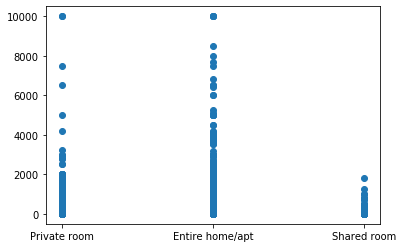

In [13]:
plt.scatter(datadf['room_type'], datadf['price'])


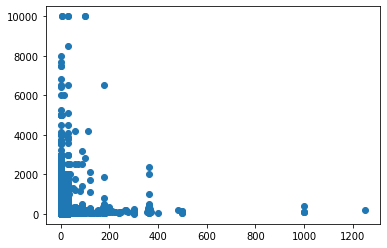

In [17]:
plt.scatter(datadf['minimum_nights'], datadf['price'])